This project is used for the KPMG Virtual Experience project with the aim of conducting customer segmentation.

The objective of this project is that KPMG has a client Sprocket Central Pty Ltd which is a company engaged in a medium size bikes & cycling accessories organization.
 
By using 3 datasets namely CustomerDemographic, CustomerAddress, and Transaction, we try to do data exploration, data insight and also do modeling for customer segmentation.

In [1]:
# Data Manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
%matplotlib inline
import plotly.express as px
import plotly.offline as pyo
pyo.init_notebook_mode()


import warnings
warnings.filterwarnings('ignore')

In [2]:
customer = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name = 'CustomerDemographic', header =1)

In [3]:
address = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name = 'CustomerAddress', header =1)

In [4]:
transaction = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name = 'Transactions', header =1)

# data quick look

In [5]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

##customer

In [6]:
customer

customer_id      first_name  last_name  gender  \
0               1         Laraine  Medendorp       F   
1               2             Eli    Bockman    Male   
2               3           Arlin     Dearle    Male   
3               4          Talbot        NaN    Male   
4               5  Sheila-kathryn     Calton  Female   
...           ...             ...        ...     ...   
3995         3996         Rosalia   Halgarth  Female   
3996         3997          Blanch     Nisuis  Female   
3997         3998          Sarene    Woolley       U   
3998         3999       Patrizius        NaN    Male   
3999         4000           Kippy    Oldland    Male   

      past_3_years_bike_related_purchases        DOB               job_title  \
0                                      93 1953-10-12     Executive Secretary   
1                                      81 1980-12-16  Administrative Officer   
2                                      61 1954-01-20      Recruiting Manager   
3                                      33 1961-10-03                     NaN   
4                                      56 1977-05-13           Senior Editor   
...                                   ...        ...                     ...   
3995                                    8 1975-08-09   VP Product Management   
3996                                   87 2001-07-13         Statistician II   
3997                                   60        NaT       Assistant Manager   
3998                                   11 1973-10-24                     NaN   
3999                                   76 1991-11-05    Software Engineer IV   

     job_industry_category     wealth_segment deceased_indicator  \
0                   Health      Mass Customer                  N   
1       Financial Services      Mass Customer                  N   
2                 Property      Mass Customer                  N   
3                       IT      Mass Customer                  N   
4                      NaN  Affluent Customer                  N   
...                    ...                ...                ...   
3995                Health      Mass Customer                  N   
3996         Manufacturing     High Net Worth                  N   
3997                    IT     High Net Worth                  N   
3998         Manufacturing  Affluent Customer                  N   
3999                   NaN  Affluent Customer                  N   

                                                default owns_car  tenure  
0                                                    "'      Yes    11.0  
1                          <script>alert('hi')</script>      Yes    16.0  
2                                   2018-02-01 00:00:00      Yes    15.0  
3     () { _; } >_[$($())] { touch /tmp/blns.shellsh...       No     7.0  
4                                                   NIL      Yes     8.0  
...                                                 ...      ...     ...  
3995                                               -100       No    19.0  
3996                                           â¦testâ§      Yes     1.0  
3997                                                NaN       No     NaN  
3998                             Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ       Yes    10.0  
3999                                                0/0       No    11.0  

[4000 rows x 13 columns]

In [7]:
customer[customer['job_title']=='Senior Editor']

customer_id      first_name    last_name  gender  \
4               5  Sheila-kathryn       Calton  Female   
163           164          Aarika   Van Vuuren  Female   
180           181           Pavla      Braunle  Female   
334           335           Debee     Martynov  Female   
488           489           Tresa        Reeks  Female   
675           676          Curtis          NaN    Male   
726           727           Lenci      Duerden    Male   
738           739           Arnie         Zorn    Male   
789           790          Yvonne          NaN  Female   
1100         1101           Haily   McWilliams  Female   
1420         1421        Mallorie        Gouth  Female   
1845         1846         Lorette       Daspar  Female   
2080         2081           Gelya       Coaker  Female   
2101         2102            Carl      Penquet    Male   
2464         2465          Paloma       Nilles  Female   
2527         2528          Cassie    Toffaloni    Male   
2788         2789        Violetta      Bucksey  Female   
2802         2803          Ailsun    Hawlgarth  Female   
2806         2807           Lynna       Revens  Female   
3180         3181            Ferd    Chominski    Male   
3221         3222         Caralie      Sellors       U   
3256         3257          Travis       Hulatt    Male   
3434         3435         Stevena      Allcock  Female   
3568         3569           Janel        Daice  Female   
3706         3707          Marten     Posnette    Male   
3789         3790          Kurtis       Morson    Male   
3931         3932          Hadley  Veracruysse    Male   
3966         3967          Lillis  Dobrowolski  Female   

      past_3_years_bike_related_purchases        DOB      job_title  \
4                                      56 1977-05-13  Senior Editor   
163                                    55 1999-08-07  Senior Editor   
180                                    49 1982-11-21  Senior Editor   
334                                    20 1983-04-19  Senior Editor   
488                                    18 1971-05-31  Senior Editor   
675                                    51 1968-05-19  Senior Editor   
726                                    98 1978-10-10  Senior Editor   
738                                    36 1964-12-13  Senior Editor   
789                                    22 1968-03-24  Senior Editor   
1100                                   76 1968-12-22  Senior Editor   
1420                                   74 1956-04-14  Senior Editor   
1845                                    4 1978-12-18  Senior Editor   
2080                                   69 1972-06-21  Senior Editor   
2101                                   80 1976-01-08  Senior Editor   
2464                                   31 1984-06-12  Senior Editor   
2527                                   81 1978-09-23  Senior Editor   
2788                                   66 1992-11-30  Senior Editor   
2802                                   95 1970-09-30  Senior Editor   
2806                                    9 1957-06-18  Senior Editor   
3180                                   39 1976-09-29  Senior Editor   
3221                                   40        NaT  Senior Editor   
3256                                   64 1980-05-07  Senior Editor   
3434                                   80 2002-01-15  Senior Editor   
3568                                   24 1973-05-18  Senior Editor   
3706                                   10 1993-05-16  Senior Editor   
3789                                   91 1959-05-31  Senior Editor   
3931                                   85 1986-07-10  Senior Editor   
3966                                   90 1978-04-18  Senior Editor   

     job_industry_category     wealth_segment deceased_indicator  \
4                      NaN  Affluent Customer                  N   
163                 Retail  Affluent Customer                  N   
180          Manufacturing      Mass Customer              

**cleaning**

In [8]:
customer.isna().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [9]:
656/4000

0.164

In [10]:
customer['job_industry_category'] = customer['job_industry_category'].fillna(value='other')

**note!!**

imputation the missing values on job_industry_category using "other" because we i do the data inspection, I couldn't find a pattern in the other data that could be used as imputation, so I used other as imputation.

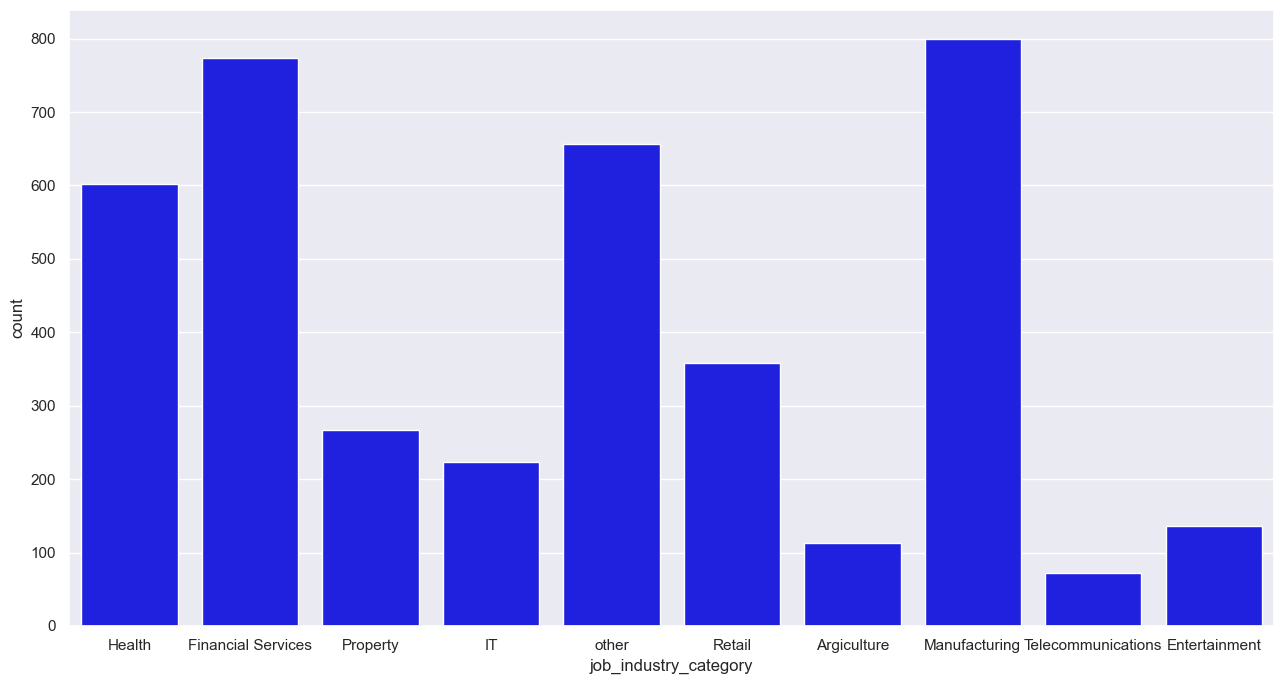

In [11]:
    plt.rcParams['figure.figsize'] = (13,7)
    plt.subplot()
    sns.countplot(x=customer['job_industry_category'], color='blue')
    plt.tight_layout()

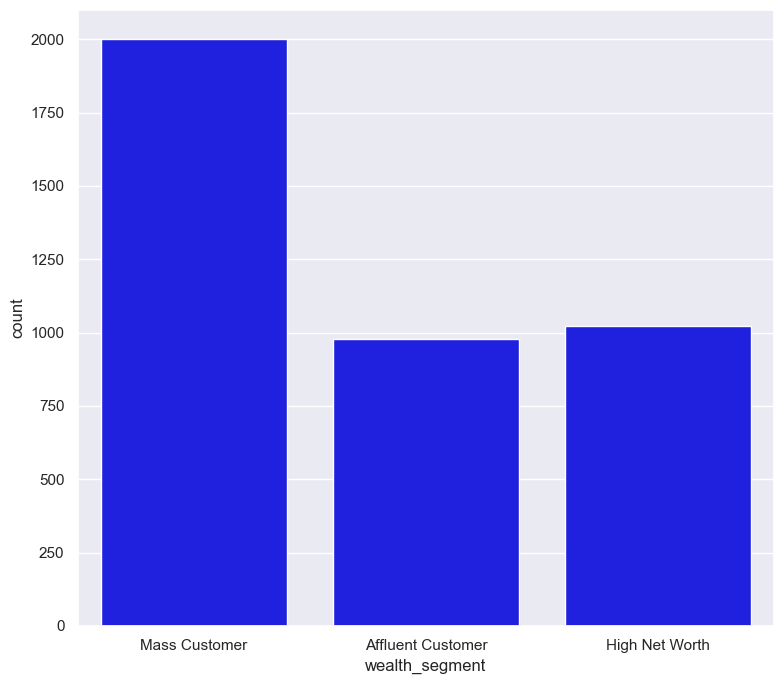

In [12]:
plt.rcParams['figure.figsize'] = (8,7)
plt.subplot()
sns.countplot(x=customer['wealth_segment'], color='blue')
plt.tight_layout()

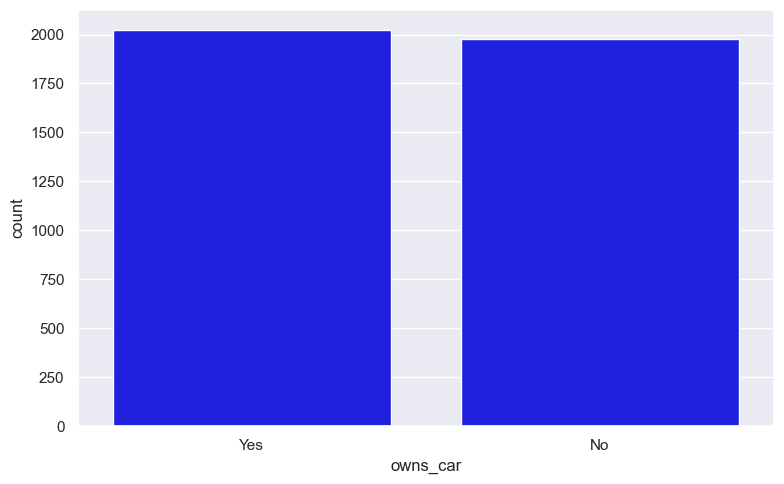

In [13]:
plt.rcParams['figure.figsize'] = (8,5)
plt.subplot()
sns.countplot(x=customer['owns_car'], color='blue')
plt.tight_layout()

## address

In [14]:
address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [15]:
address.head(2)

customer_id              address  postcode            state    country  \
0            1   060 Morning Avenue      2016  New South Wales  Australia   
1            2  6 Meadow Vale Court      2153  New South Wales  Australia   

   property_valuation  
0                  10  
1                  10

In [16]:
address['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [17]:
 1021/(2140+1021+838)

0.25531382845711426

**Change the Value**

In [18]:
address['state'] = address['state'].replace({'New South Wales':'NSW', 'Victoria':'VIC'})

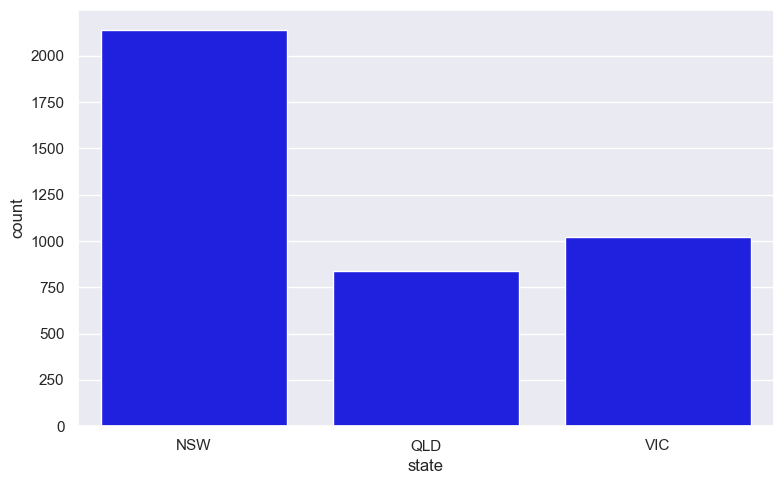

In [19]:
plt.rcParams['figure.figsize'] = (8,5)
plt.subplot()
sns.countplot(x=address['state'], color='blue')
plt.tight_layout()

## transaction

In [20]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [21]:
transaction

transaction_id  product_id  customer_id transaction_date  online_order  \
0                   1           2         2950       2017-02-25           0.0   
1                   2           3         3120       2017-05-21           1.0   
2                   3          37          402       2017-10-16           0.0   
3                   4          88         3135       2017-08-31           0.0   
4                   5          78          787       2017-10-01           1.0   
...               ...         ...          ...              ...           ...   
19995           19996          51         1018       2017-06-24           1.0   
19996           19997          41          127       2017-11-09           1.0   
19997           19998          87         2284       2017-04-14           1.0   
19998           19999           6         2764       2017-07-03           0.0   
19999           20000          11         1144       2017-09-22           1.0   

      order_status           brand product_line product_class product_size  \
0         Approved           Solex     Standard        medium       medium   
1         Approved   Trek Bicycles     Standard        medium        large   
2         Approved      OHM Cycles     Standard           low       medium   
3         Approved  Norco Bicycles     Standard        medium       medium   
4         Approved  Giant Bicycles     Standard        medium        large   
...            ...             ...          ...           ...          ...   
19995     Approved      OHM Cycles     Standard          high       medium   
19996     Approved           Solex         Road        medium       medium   
19997     Approved      OHM Cycles     Standard        medium       medium   
19998     Approved      OHM Cycles     Standard          high       medium   
19999     Approved   Trek Bicycles     Standard        medium        small   

       list_price  standard_cost  product_first_sold_date  
0           71.49          53.62                  41245.0  
1         2091.47         388.92                  41701.0  
2         1793.43         248.82                  36361.0  
3         1198.46         381.10                  36145.0  
4         1765.30         709.48                  42226.0  
...           ...            ...                      ...  
19995     2005.66        1203.40                  37823.0  
19996      416.98         312.74                  35560.0  
19997     1636.90          44.71                  40410.0  
19998      227.88         136.73                  38216.0  
19999     1775.81        1580.47                  36334.0  

[20000 rows x 13 columns]

In [22]:
transaction[transaction['customer_id']==127.0]

transaction_id  product_id  customer_id transaction_date  online_order  \
1154             1155          16          127       2017-01-03           1.0   
2785             2786          85          127       2017-12-07           1.0   
3217             3218          26          127       2017-03-03           0.0   
5759             5760          42          127       2017-01-21           1.0   
11051           11052           6          127       2017-09-11           1.0   
11245           11246          53          127       2017-06-09           1.0   
11310           11311           9          127       2017-02-11           1.0   
17846           17847          21          127       2017-06-07           1.0   
18956           18957          62          127       2017-11-27           0.0   
19996           19997          41          127       2017-11-09           1.0   

      order_status           brand product_line product_class product_size  \
1154      Approved  Norco Bicycles     Standard          high        small   
2785      Approved        WeareA2B     Standard        medium       medium   
3217      Approved        WeareA2B     Standard        medium       medium   
5759      Approved      OHM Cycles         Road        medium        small   
11051     Approved      OHM Cycles     Standard          high       medium   
11245     Approved      OHM Cycles     Standard        medium       medium   
11310     Approved      OHM Cycles         Road        medium       medium   
17846     Approved           Solex     Standard        medium        large   
18956     Approved           Solex     Standard        medium       medium   
19996     Approved           Solex         Road        medium       medium   

       list_price  standard_cost  product_first_sold_date  
1154      1661.92        1479.11                  34586.0  
2785       752.64         205.36                  42218.0  
3217      1992.93         762.63                  34115.0  
5759      1810.00        1610.90                  39526.0  
11051      227.88         136.73                  37659.0  
11245      795.34         101.58                  35470.0  
11310      742.54         667.40                  33549.0  
17846     1071.23         380.74                  35160.0  
18956      478.16         298.72                  34143.0  
19996      416.98         312.74                  35560.0

In [23]:
transaction.shape

(20000, 13)

Segmentation model -> RFMP 
- recency = transaction_date
- frequency = count transaction id based on customer id
- monetary = list_price
- profit = list_price - standrad_price

# data cleaning

## duplicate

In [24]:
transaction.duplicated().sum()

0

## missing value

In [25]:
transaction.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [26]:
nul = pd.isnull(transaction['standard_cost'])

In [27]:
transaction[nul]

transaction_id  product_id  customer_id transaction_date  online_order  \
136               137           0          431       2017-09-23           0.0   
159               160           0         3300       2017-08-27           0.0   
366               367           0         1614       2017-03-10           0.0   
406               407           0         2559       2017-06-14           1.0   
676               677           0         2609       2017-07-02           0.0   
...               ...         ...          ...              ...           ...   
19340           19341           0          443       2017-12-26           1.0   
19383           19384           0         2407       2017-06-11           0.0   
19793           19794           0         2860       2017-01-13           0.0   
19859           19860           0         2468       2017-06-24           1.0   
19871           19872           0           61       2017-03-17           1.0   

      order_status brand product_line product_class product_size  list_price  \
136       Approved   NaN          NaN           NaN          NaN     1942.61   
159       Approved   NaN          NaN           NaN          NaN     1656.86   
366       Approved   NaN          NaN           NaN          NaN      850.89   
406       Approved   NaN          NaN           NaN          NaN      710.59   
676       Approved   NaN          NaN           NaN          NaN     1972.01   
...            ...   ...          ...           ...          ...         ...   
19340     Approved   NaN          NaN           NaN          NaN      744.54   
19383     Approved   NaN          NaN           NaN          NaN     1098.18   
19793     Approved   NaN          NaN           NaN          NaN      868.56   
19859     Approved   NaN          NaN           NaN          NaN     1497.43   
19871     Approved   NaN          NaN           NaN          NaN      867.92   

       standard_cost  product_first_sold_date  
136              NaN                      NaN  
159              NaN                      NaN  
366              NaN                      NaN  
406              NaN                      NaN  
676              NaN                      NaN  
...              ...                      ...  
19340            NaN                      NaN  
19383            NaN                      NaN  
19793            NaN                      NaN  
19859            NaN                      NaN  
19871            NaN                      NaN  

[197 rows x 13 columns]

In [28]:
transaction[transaction['product_id']==0]

transaction_id  product_id  customer_id transaction_date  online_order  \
34                 35           0         2171       2017-08-20           0.0   
39                 40           0         2448       2017-11-28           1.0   
54                 55           0         3140       2017-09-18           0.0   
60                 61           0         1839       2017-02-24           0.0   
63                 64           0         2000       2017-07-08           0.0   
...               ...         ...          ...              ...           ...   
19921           19922           0         1869       2017-01-06           1.0   
19941           19942           0          966       2017-07-30           1.0   
19967           19968           0         2751       2017-04-06           0.0   
19987           19988           0           13       2017-04-05           1.0   
19988           19989           0          714       2017-04-27           1.0   

      order_status           brand product_line product_class product_size  \
34        Approved  Norco Bicycles         Road        medium       medium   
39        Approved  Norco Bicycles         Road        medium       medium   
54        Approved  Norco Bicycles     Standard           low       medium   
60        Approved      OHM Cycles         Road          high        large   
63        Approved   Trek Bicycles     Standard        medium       medium   
...            ...             ...          ...           ...          ...   
19921     Approved  Norco Bicycles         Road        medium       medium   
19941     Approved      OHM Cycles     Standard           low       medium   
19967     Approved        WeareA2B     Standard        medium       medium   
19987     Approved  Norco Bicycles         Road        medium       medium   
19988     Approved  Norco Bicycles     Standard           low       medium   

       list_price  standard_cost  product_first_sold_date  
34         544.05         376.84                  38647.0  
39         544.05         376.84                  38647.0  
54         363.01         290.41                  38482.0  
60          12.01           7.21                  34244.0  
63         499.53         388.72                  39031.0  
...           ...            ...                      ...  
19921      543.39         407.54                  37698.0  
19941       71.16          56.93                  38647.0  
19967       60.34          45.26                  34165.0  
19987      544.05         376.84                  42105.0  
19988      363.01         290.41                  37626.0  

[1378 rows x 13 columns]

In [29]:
197/20000

0.00985

The missing value is less than 1% and the result of the investigation was that there was also a missing value in another column with the same row so it was not possible to impute the value with related data, so I decided to remove the missing value.

In [30]:
transaction.dropna(subset = ['standard_cost'], inplace=True)

In [31]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19803 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19803 non-null  int64         
 1   product_id               19803 non-null  int64         
 2   customer_id              19803 non-null  int64         
 3   transaction_date         19803 non-null  datetime64[ns]
 4   online_order             19445 non-null  float64       
 5   order_status             19803 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               19803 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

I decided to only clean up the missing values in standrad_cost because I only use the transaction date, order id, customer id, and list price columns for future analysis.

# Descriptive Statistic

In [32]:
print('columns and number of unique values')
dict=[]
for i in transaction.columns:
    print(f'{i} -> {transaction[i].nunique()}')

columns and number of unique values
transaction_id -> 19803
product_id -> 101
customer_id -> 3494
transaction_date -> 364
online_order -> 2
order_status -> 2
brand -> 6
product_line -> 4
product_class -> 3
product_size -> 3
list_price -> 100
standard_cost -> 103
product_first_sold_date -> 100


Observation Result:
- there are 3494 customer id
- there are 19803 transaction id
- transaction date already has the correct data type
- there are 100 list price
- there are 103 standard costs

**change the data type that should be object became object**

In [33]:
transaction[["transaction_id","product_id","customer_id","online_order"]] = transaction[["transaction_id","product_id","customer_id","online_order"]].astype(np.object)

**Change the value of online order**

In [34]:
transaction['online_order'] = transaction['online_order'].replace({1:'Yes', 0:'No'})

**look for describtive statistic for obejct variabel**

In [35]:
transaction.describe(include=['object'])

transaction_id  product_id  customer_id online_order order_status  \
count            19803       19803        19803        19445        19803   
unique           19803         101         3494            2            2   
top                  1           0         1068          Yes     Approved   
freq                 1        1181           14         9739        19625   

        brand product_line product_class product_size  
count   19803        19803         19803        19803  
unique      6            4             3            3  
top     Solex     Standard        medium       medium  
freq     4253        14176         13826        12990

observation result:
- the most order that have made is from online order
- most of order status are approved
- the highest brand that have been ordered in 2017 was Solex
- there are 4 type of product_line and the most ordered was the standard one
- there are 3 class of product_class and the most ordered was the medium one
- product_size have 3 type, but the most ordered on 2017 was medium size

**look for descriptive statistic for numeric variable**

In [36]:
transaction.describe()

list_price  standard_cost  product_first_sold_date
count  19803.000000   19803.000000             19803.000000
mean    1107.997866     556.046951             38199.776549
std      582.770460     405.955660              2875.201110
min       12.010000       7.210000             33259.000000
25%      575.270000     215.140000             35667.000000
50%     1163.890000     507.580000             38216.000000
75%     1635.300000     795.100000             40672.000000
max     2091.470000    1759.850000             42710.000000

observation result:
- list orice has the lowest price at 12.02 dollar and the highest 2091.47 dollar with average price in about 1163.89 dollar
- standard_cost have the lowest cost at 7.21 dollar and the highest 1759.85 dollar with average cost at 507.58 dollar

# Univariate Analysis

In [37]:
num = transaction.select_dtypes(include=[np.number])
cat = transaction.select_dtypes(exclude=[np.number])

numerical= num.columns
categorical = cat.columns 
print(numerical)
print(categorical)

Index(['list_price', 'standard_cost', 'product_first_sold_date'], dtype='object')
Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size'],
      dtype='object')


## Numerical 

### KDE Plot

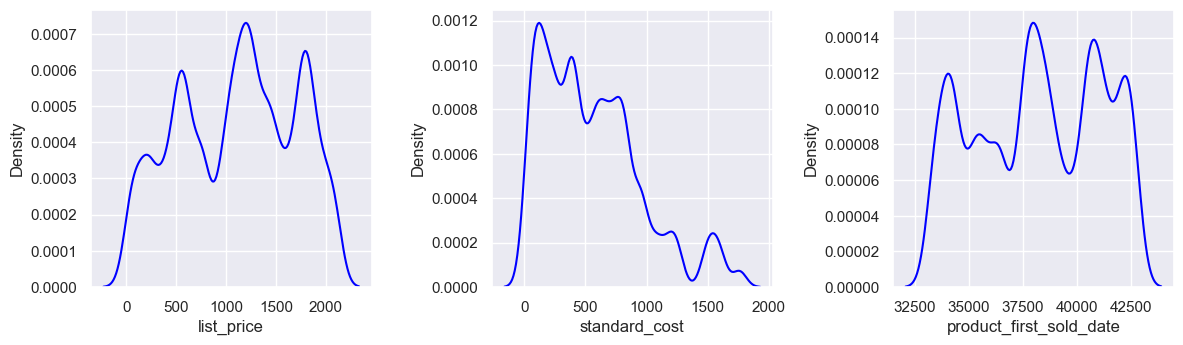

In [38]:
features = numerical
for i in range(0, len(features)):
    plt.rcParams['figure.figsize'] = (12,10)
    plt.subplot(3,3,i+1)
    sns.kdeplot(x=transaction[features[i]], color='blue')
    plt.xlabel(features[i])
    plt.tight_layout()

**KDE Plot Analysis:**
It can be seen that standard_cost has a positively skewed distribution.

### Violin Plot 

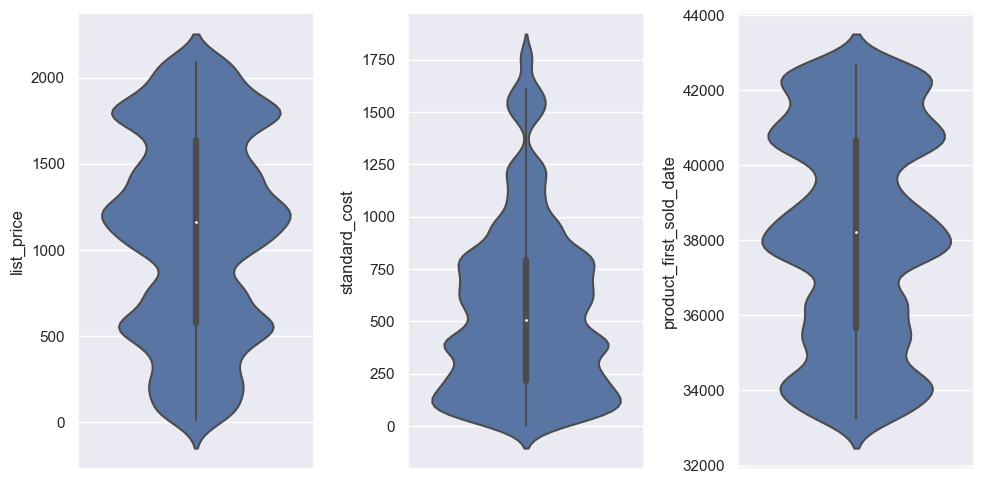

In [39]:
features = numerical
for i in range(0, len(features)):
    plt.rcParams['figure.figsize'] = (10,5)
    plt.subplot(1,len(features),i+1)
    sns.violinplot(y=transaction[features[i]])
    plt.tight_layout()    

**Violin Plot Analysis:**
It can be seen that standard cost has more outliers than list price.

**check the outlier**

In [40]:
Q1 = transaction['standard_cost'].quantile(0.25)
Q3 = transaction['standard_cost'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
outlier = ~((transaction['standard_cost'] >= low_limit) & (transaction['standard_cost'] <= high_limit))
outlier_standard_cost = transaction[outlier]
outlier_standard_cost.shape

(195, 13)

it turns out that there are only 195 row values that are outliers

## Categorical

### Countplot Analysis

In [41]:
cat.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size'],
      dtype='object')

In [42]:
feature = cat.drop(['transaction_id','product_id','customer_id','transaction_date'], axis=1).columns
features

Index(['list_price', 'standard_cost', 'product_first_sold_date'], dtype='object')

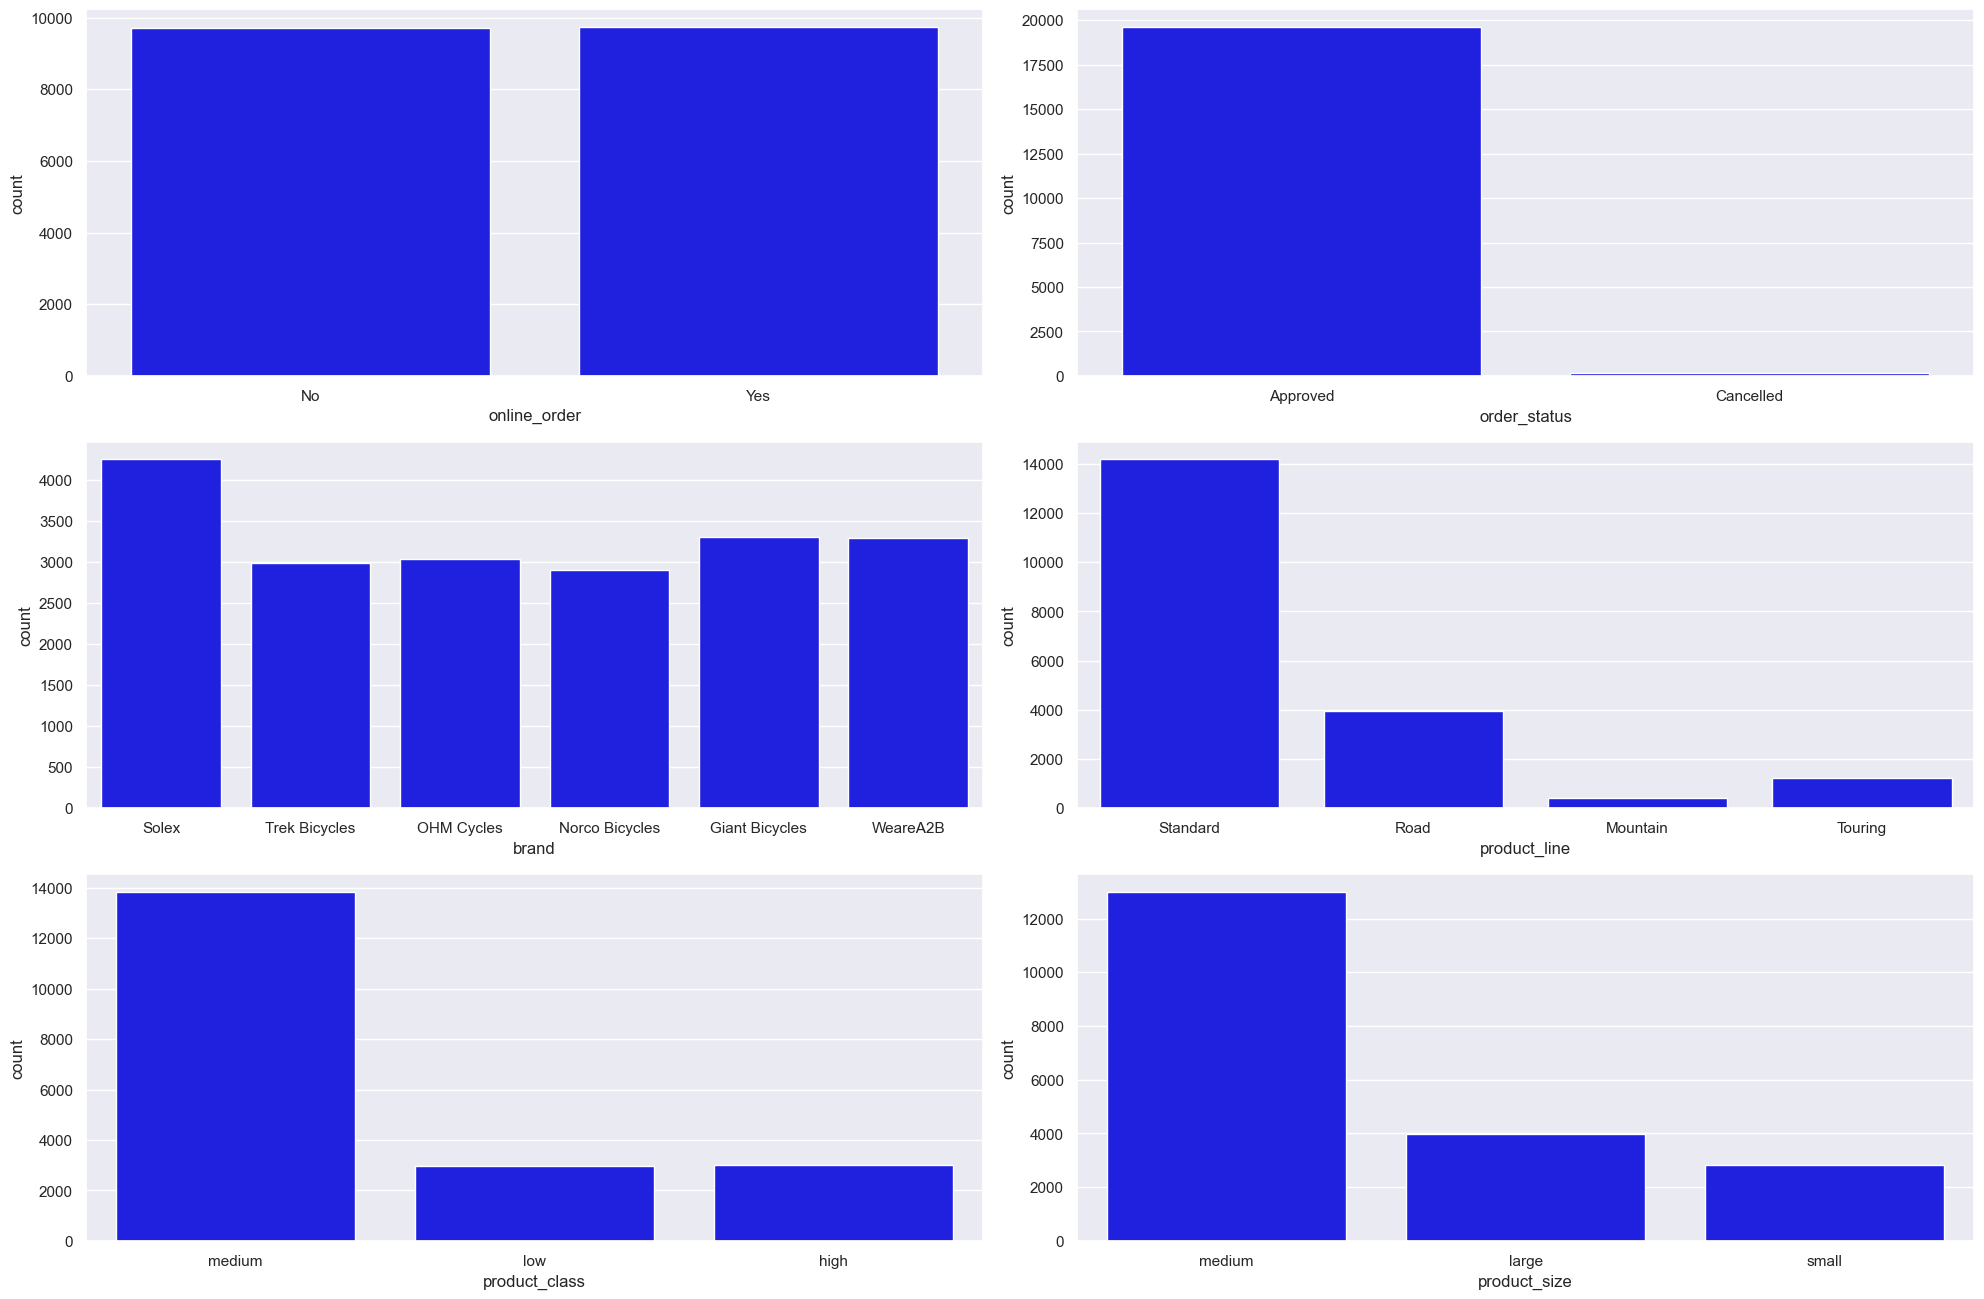

In [43]:
for i in range(0, len(feature)):
    plt.rcParams['figure.figsize'] = (20,17)
    plt.subplot(4, 2, i+1)
    sns.countplot(x=transaction[feature[i]], color='blue')
    plt.tight_layout()

observation result:
- From the count plot, it turns out that the composition of customers ordering online and not online looks balanced.
- Only a few orders were canceled
- Solex occupies the first position as the customer's favorite brand with a gap that tends to be far from other brands.
- The most ordered products are standard product lines with medium class and medium size products as well.

### trit

In [44]:
transaction['brand'].value_counts()

Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64

In [45]:
4253/(4253+3312+3295+3043+2990+2910)

0.21476543957986163

In [46]:
transaction['product_line'].value_counts()

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

In [47]:
14176/(14176+3970+1234+423)

0.7158511336666161

# data prep before clustering

## recency

In [48]:
last_date = transaction['transaction_date'].max()
last_date

Timestamp('2017-12-30 00:00:00')

In [49]:
import datetime as dt
NOW = dt.date(2017,12,30)

In [50]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19803 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19803 non-null  object        
 1   product_id               19803 non-null  object        
 2   customer_id              19803 non-null  object        
 3   transaction_date         19803 non-null  datetime64[ns]
 4   online_order             19445 non-null  object        
 5   order_status             19803 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               19803 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [51]:
transaction['transaction_date'] = transaction['transaction_date'].dt.date

## frequency

we'll count the transaction_id become our freqeuncy on the aggregation step based on user_id

## Monetary

monetary column is the list_price column

## Profit

In [52]:
transaction['profit'] = transaction['list_price']-transaction['standard_cost']
transaction.head(2)

transaction_id product_id customer_id transaction_date online_order  \
0              1          2        2950       2017-02-25           No   
1              2          3        3120       2017-05-21          Yes   

  order_status          brand product_line product_class product_size  \
0     Approved          Solex     Standard        medium       medium   
1     Approved  Trek Bicycles     Standard        medium        large   

   list_price  standard_cost  product_first_sold_date   profit  
0       71.49          53.62                  41245.0    17.87  
1     2091.47         388.92                  41701.0  1702.55

# table rfm

## Aggregation

Aggreagate the data based on `customer_id`

In [53]:
rfmTable = transaction.groupby('customer_id').agg({'transaction_date': lambda x: (NOW - x.max()).days, # Recency
                                        'transaction_id': lambda x: len(x),      # Frequency
                                        'list_price': lambda x: x.sum(),         #Monetary
                                        'profit': lambda x: x.sum()}) # Profit

rfmTable['transaction_date'] = rfmTable['transaction_date'].astype(int)
rfmTable.rename(columns={'transaction_date': 'recency', 
                         'transaction_id': 'frequency', 
                         'list_price': 'monetary'}, inplace=True)

In [54]:
rfmTable

recency  frequency  monetary       profit
customer_id                                           
1                  7         11   9084.45  3018.090000
2                128          3   4149.07  2226.260000
3                102          8   9888.23  3362.810000
4                195          2   1047.72   220.570000
5                 16          6   5903.20  2394.940000
...              ...        ...       ...          ...
3497              52          3   3744.07  1648.320000
3498             127          6   5177.06  3147.330000
3499              51          7   7673.48  4955.250000
3500             144          6   4922.41  1785.860000
5034              84          3   1519.92   269.484972

[3494 rows x 4 columns]

In [55]:
transaction[transaction['customer_id']==1].sort_values('transaction_date')

transaction_id product_id customer_id transaction_date online_order  \
9784            9785         72           1       2017-01-05           No   
13423          13424          2           1       2017-02-21           No   
14485          14486         23           1       2017-03-27           No   
18969          18970         11           1       2017-03-29          Yes   
3764            3765         38           1       2017-04-06          Yes   
5156            5157         47           1       2017-05-11          Yes   
13643          13644         25           1       2017-05-19           No   
15662          15663         32           1       2017-06-04          Yes   
16422          16423          9           1       2017-12-09          Yes   
14930          14931         31           1       2017-12-14          Yes   
93                94         86           1       2017-12-23           No   

      order_status           brand product_line product_class product_size  \
9784      Approved  Norco Bicycles     Standard        medium       medium   
13423     Approved           Solex     Standard        medium       medium   
14485     Approved  Norco Bicycles     Mountain           low        small   
18969     Approved  Giant Bicycles     Standard          high       medium   
3764      Approved           Solex     Standard        medium       medium   
5156      Approved   Trek Bicycles         Road           low        small   
13643     Approved  Giant Bicycles         Road        medium       medium   
15662     Approved  Giant Bicycles     Standard        medium       medium   
16422     Approved      OHM Cycles         Road        medium       medium   
14930     Approved  Giant Bicycles     Standard        medium       medium   
93        Approved      OHM Cycles     Standard        medium       medium   

       list_price  standard_cost  product_first_sold_date  profit  
9784       360.40         270.30                  37873.0   90.10  
13423       71.49          53.62                  38573.0   17.87  
14485      688.63         612.88                  33455.0   75.75  
18969     1274.93         764.96                  35378.0  509.97  
3764      1577.53         826.51                  39526.0  751.02  
5156      1720.70        1531.42                  37823.0  189.28  
13643     1538.99         829.65                  33552.0  709.34  
15662      642.70         211.37                  40618.0  431.33  
16422      742.54         667.40                  37838.0   75.14  
14930      230.91         173.18                  37337.0   57.73  
93         235.63         125.07                  38482.0  110.56

In [56]:
(NOW - dt.date(2017,12,23)).days==7

True

**Our data is correct!!**

In [57]:
rfmSegmentation = rfmTable.copy()

In [58]:
rfmSegmentation.head(2)

recency  frequency  monetary   profit
customer_id                                       
1                  7         11   9084.45  3018.09
2                128          3   4149.07  2226.26

# K-Means

## Standardization

we must standardize the data before entering the modeling because the use of clustering models will produce better results if the data is standardized.

In [59]:
rfm = rfmSegmentation[['recency','frequency','monetary','profit']]
column=['recency','frequency','monetary','profit']

In [60]:
from sklearn.preprocessing import StandardScaler

rfm_std = rfmSegmentation[['recency','frequency','monetary','profit']]
#rfm_std sebagai dataset untuk clustering

scale = StandardScaler()
column_all = [x for x in column]
for column in column_all:
  rfm_std[column] = scale.fit_transform(np.array(rfm_std[column]).reshape(-1,1))
rfm_std.describe()

recency     frequency      monetary        profit
count  3.494000e+03  3.494000e+03  3.494000e+03  3.494000e+03
mean   3.932172e-17  3.234073e-16 -1.776230e-16 -1.442591e-17
std    1.000143e+00  1.000143e+00  1.000143e+00  1.000143e+00
min   -1.051555e+00 -2.019958e+00 -2.111426e+00 -1.758601e+00
25%   -7.603294e-01 -7.217057e-01 -7.218000e-01 -7.269636e-01
50%   -2.977952e-01  1.437962e-01 -9.792217e-02 -1.504399e-01
75%    4.217025e-01  5.765471e-01  6.299513e-01  5.958407e-01
max    4.995652e+00  3.605804e+00  4.342538e+00  4.824455e+00

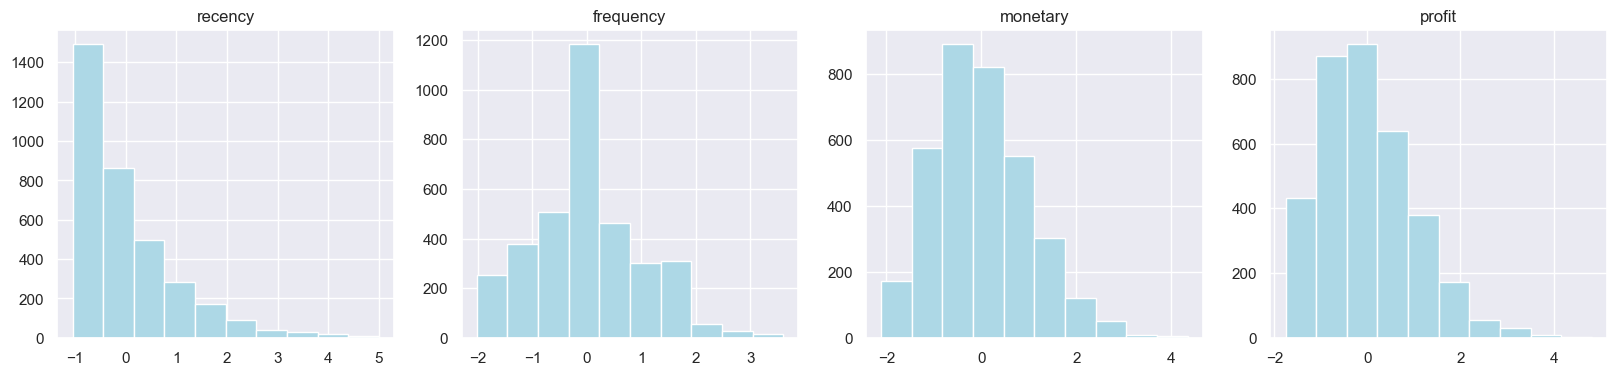

In [61]:
column=['recency','frequency','monetary','profit']
def plotting_boxplot(lst):
    plt.figure(figsize=[len(lst)*5,4])
    i = 1
    for col in lst:
        ax = plt.subplot(1,len(lst),i)
        plt.hist(rfm_std[col], color = 'lightblue')
        plt.title(col)
        i = i+1
    plt.show()
plotting_boxplot(column)

## Define K value

### Elbow Method

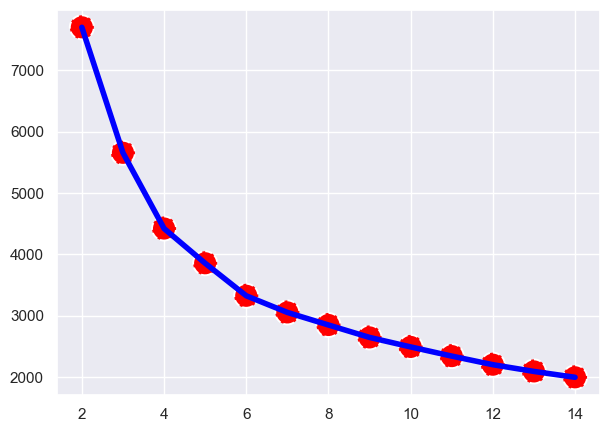

In [62]:
from sklearn.cluster import KMeans #K-Means Clustering
inertia = []

for i in range(2, 15):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(rfm_std.values)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(7,5))

sns.lineplot(x=range(2, 15), y=inertia, color='blue', linewidth = 4)
sns.scatterplot(x=range(2, 15), y=inertia, s=300, color='red',  linestyle='--')
plt.show()

it's look like the elbow is on 4,so we define it become our K value

## Modeling 4

In [63]:
kmeans = KMeans(n_clusters=4, random_state=40)

kl = kmeans.fit(rfm_std.values)
labels_cluster = kl.labels_

In [64]:
data_cluster4 = rfm_std.assign(Cluster = labels_cluster)
clustering4 = rfmSegmentation.assign(Cluster = labels_cluster)

In [65]:
data_cluster4

recency  frequency  monetary    profit  Cluster
customer_id                                                  
1           -0.931638   2.307551  0.952134 -0.062256        1
2            1.141200  -1.154457 -0.723359 -0.509546        3
3            0.695797   1.009298  1.225006  0.132470        2
4            2.288970  -1.587208 -1.776224 -1.642524        3
5           -0.777460   0.143796 -0.127856 -0.414262        2
...               ...        ...       ...       ...      ...
3497        -0.160748  -1.154457 -0.860851 -0.836014        0
3498         1.124069   0.143796 -0.374371  0.010749        2
3499        -0.177879   0.576547  0.473129  1.032010        2
3500         1.415294   0.143796 -0.460821 -0.758320        3
5034         0.387441  -1.154457 -1.615919 -1.614892        0

[3494 rows x 5 columns]

In [66]:
clustering4

recency  frequency  monetary       profit  Cluster
customer_id                                                    
1                  7         11   9084.45  3018.090000        1
2                128          3   4149.07  2226.260000        3
3                102          8   9888.23  3362.810000        2
4                195          2   1047.72   220.570000        3
5                 16          6   5903.20  2394.940000        2
...              ...        ...       ...          ...      ...
3497              52          3   3744.07  1648.320000        0
3498             127          6   5177.06  3147.330000        2
3499              51          7   7673.48  4955.250000        2
3500             144          6   4922.41  1785.860000        3
5034              84          3   1519.92   269.484972        0

[3494 rows x 5 columns]

## Plotting

### RF

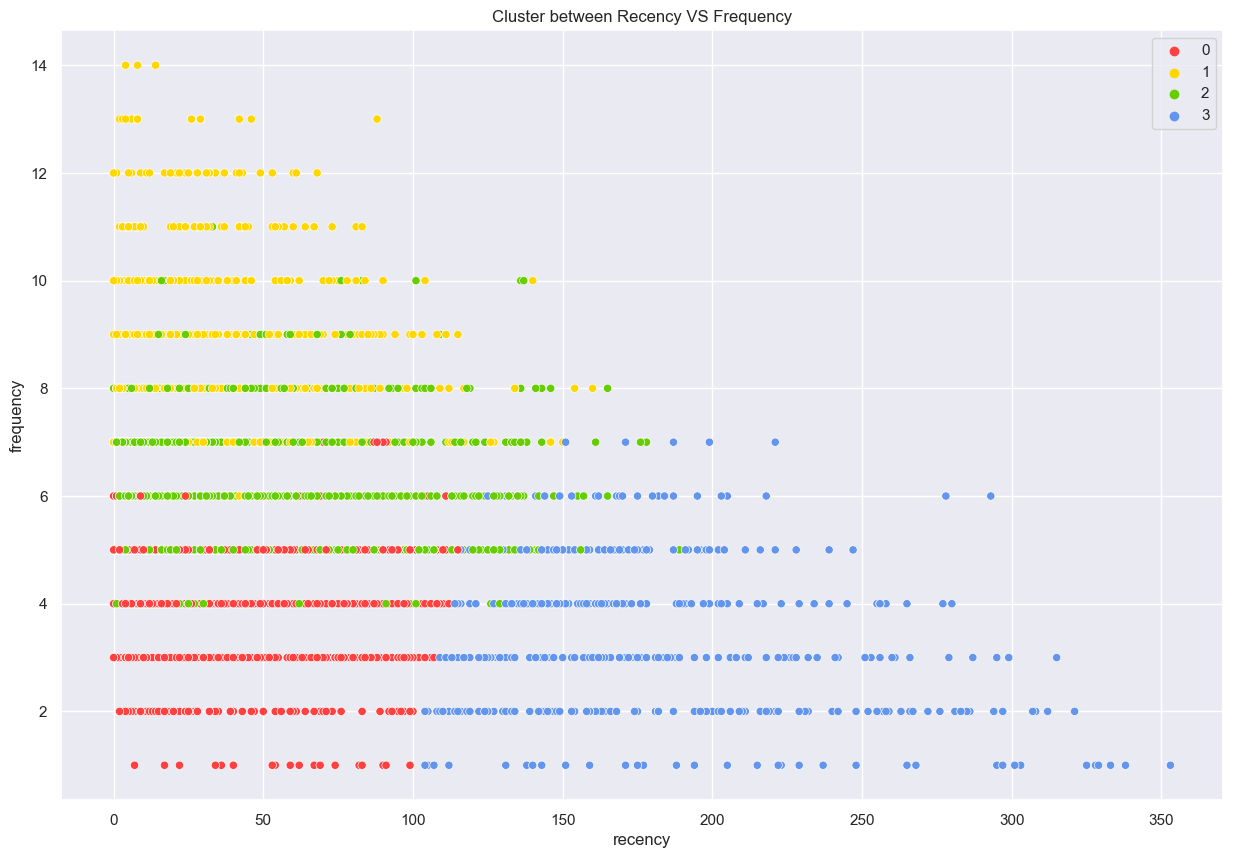

In [67]:
#Pallete
pal = ["#FF4040","#FFD700", "#66CD00","#6495ED"]
plt.figure(figsize= (15,10))
pl = sns.scatterplot(data = clustering4, x = clustering4['recency'], y = clustering4['frequency'], hue = clustering4["Cluster"], palette= pal)
pl.set_title("Cluster between Recency VS Frequency")
plt.legend()
plt.show()

### RM

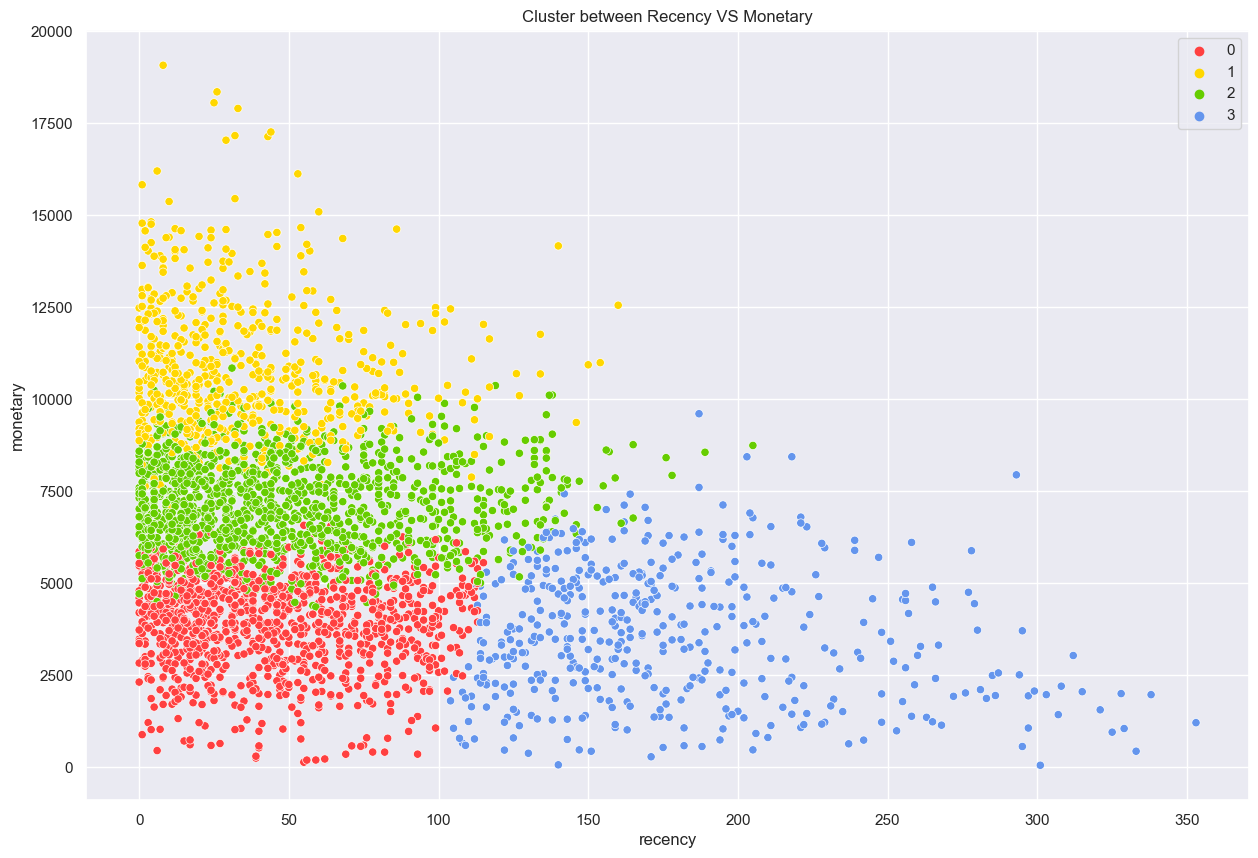

In [68]:
#Pallete
pal = ["#FF4040","#FFD700", "#66CD00","#6495ED"]
plt.figure(figsize= (15,10))
pl = sns.scatterplot(data = clustering4, x = clustering4['recency'], y = clustering4['monetary'], hue = clustering4["Cluster"], palette= pal)
pl.set_title("Cluster between Recency VS Monetary")
plt.legend()
plt.show()

### RP

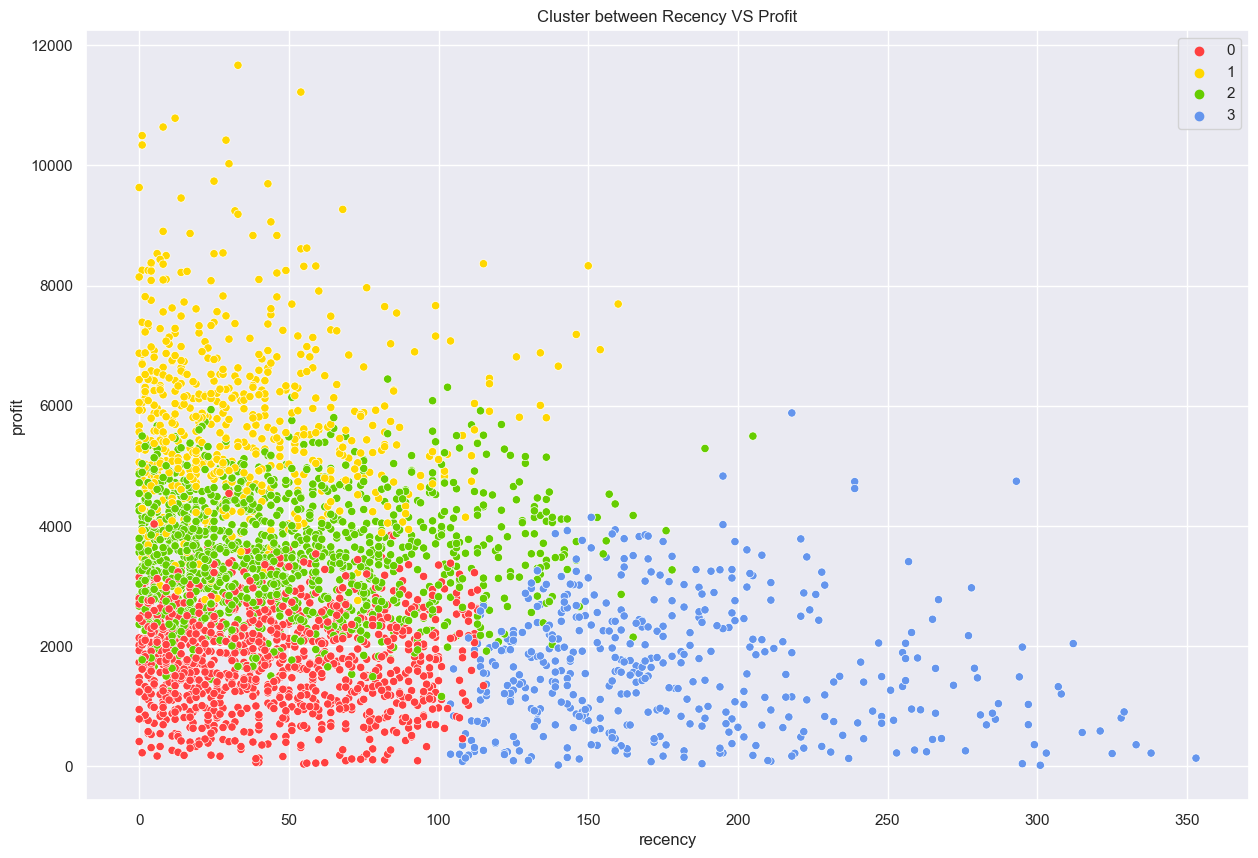

In [69]:
#Pallete
pal = ["#FF4040","#FFD700", "#66CD00","#6495ED"]
plt.figure(figsize= (15,10))
pl = sns.scatterplot(data = clustering4, x = clustering4['recency'], y = clustering4['profit'], hue = clustering4["Cluster"], palette= pal)
pl.set_title("Cluster between Recency VS Profit")
plt.legend()
plt.show()

### FM

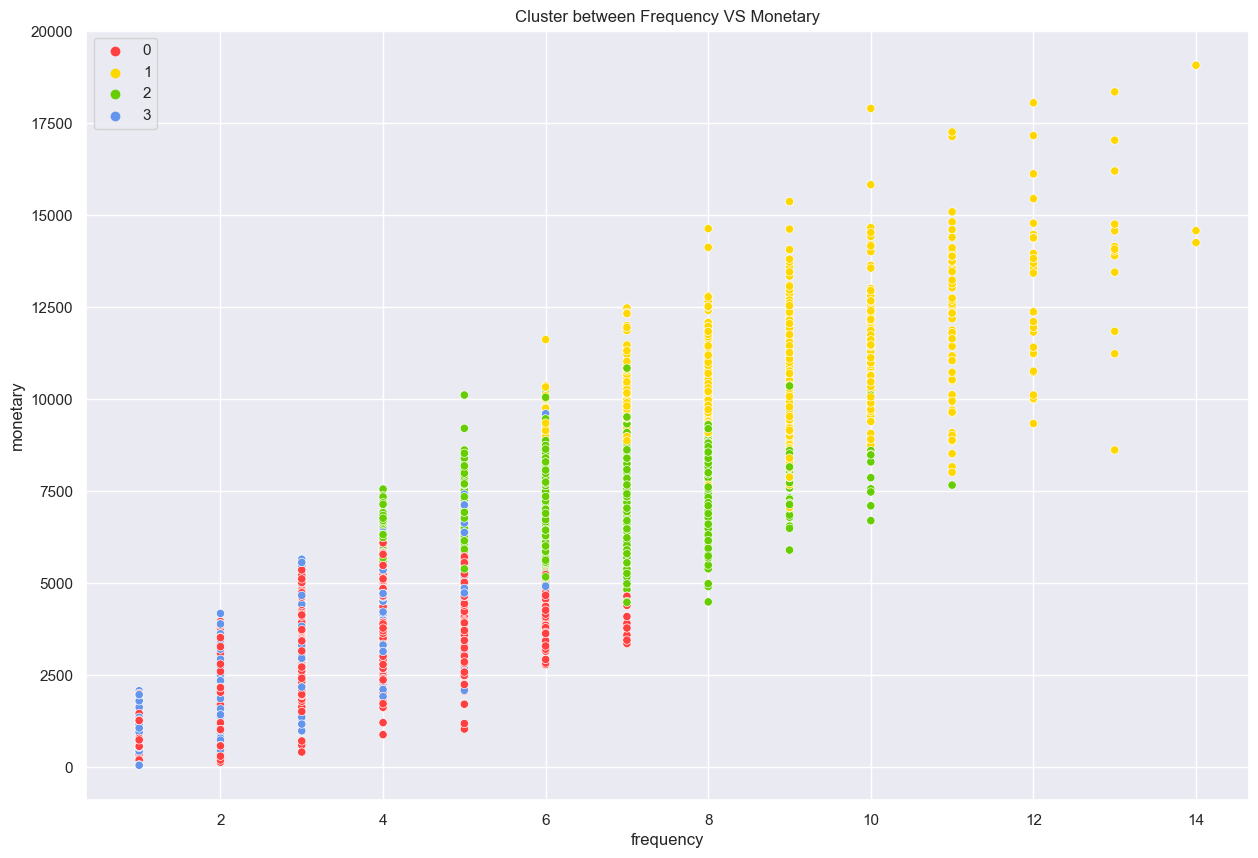

In [70]:
#Pallete
pal = ["#FF4040","#FFD700", "#66CD00","#6495ED"]
plt.figure(figsize= (15,10))
pl = sns.scatterplot(data = clustering4, x = clustering4['frequency'], y = clustering4['monetary'], hue = clustering4["Cluster"], palette= pal)
pl.set_title("Cluster between Frequency VS Monetary")
plt.legend()
plt.show()

###FP

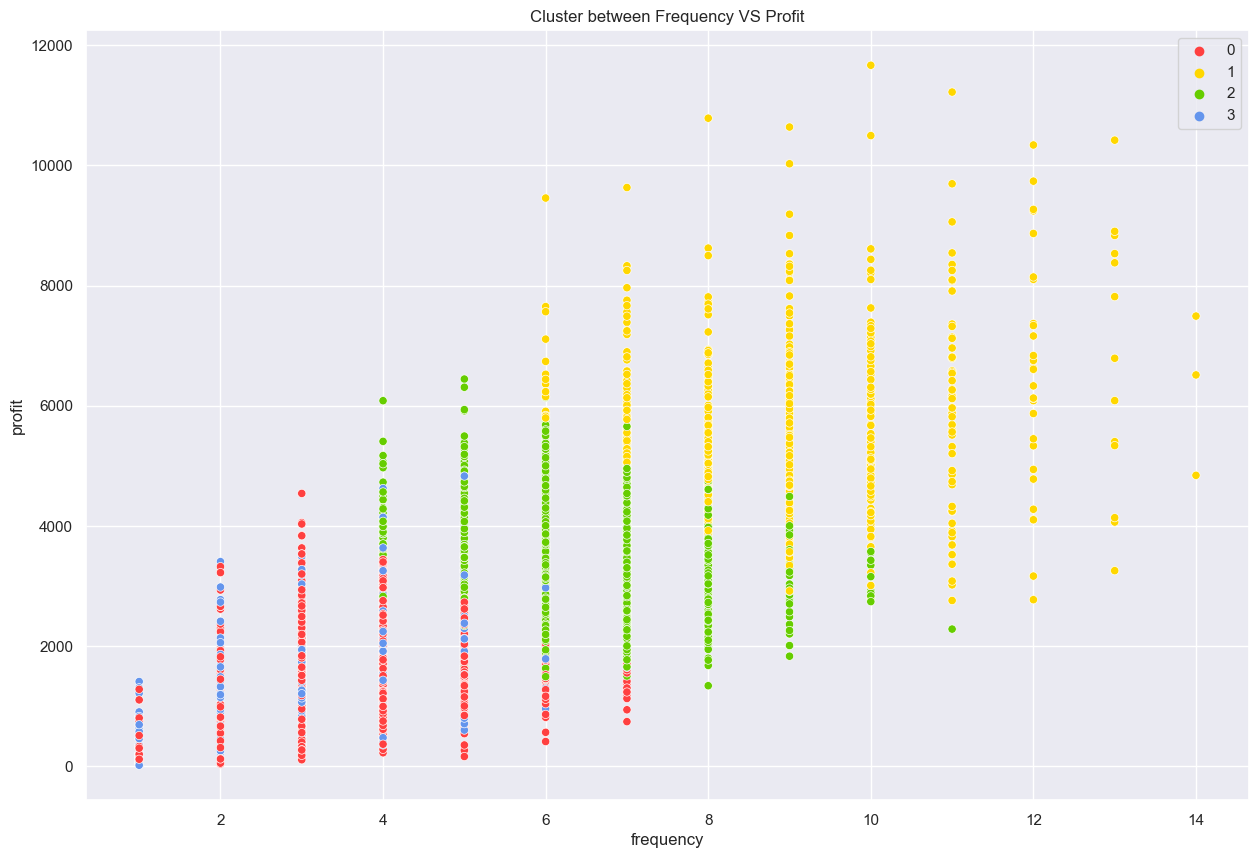

In [71]:
#Pallete
pal = ["#FF4040","#FFD700", "#66CD00","#6495ED"]
plt.figure(figsize= (15,10))
pl = sns.scatterplot(data = clustering4, x = clustering4['frequency'], y = clustering4['profit'], hue = clustering4["Cluster"], palette= pal)
pl.set_title("Cluster between Frequency VS Profit")
plt.legend()
plt.show()

### MP

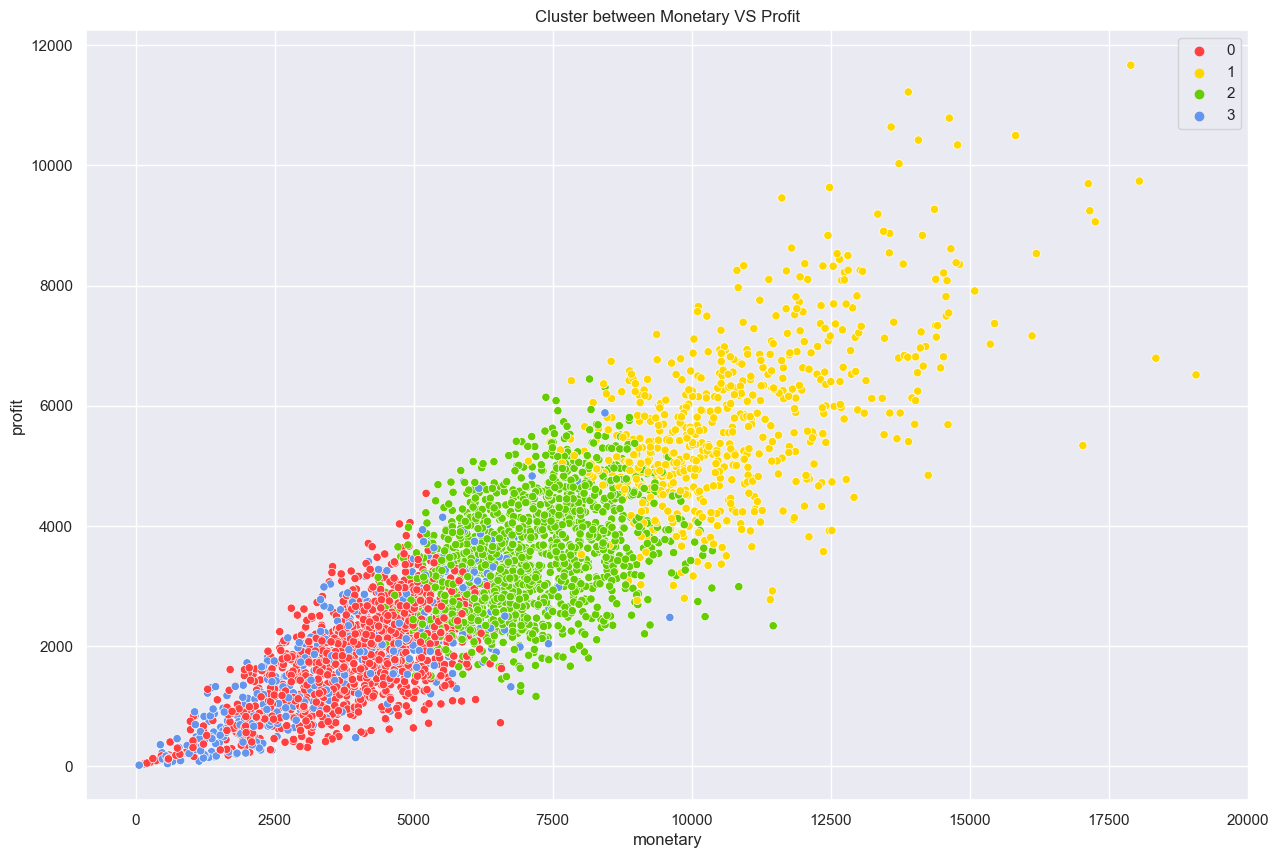

In [72]:
#Pallete
pal = ["#FF4040","#FFD700", "#66CD00","#6495ED"]
plt.figure(figsize= (15,10))
pl = sns.scatterplot(data = clustering4, x = clustering4['monetary'], y = clustering4['profit'], hue = clustering4["Cluster"], palette= pal)
pl.set_title("Cluster between Monetary VS Profit")
plt.legend()
plt.show()

# Get the Targeted Customer

In [73]:
clustering4['Cluster'].value_counts()

2    1320
0    1097
1     615
3     462
Name: Cluster, dtype: int64

In [74]:
clustering4.head()

recency  frequency  monetary   profit  Cluster
customer_id                                                
1                  7         11   9084.45  3018.09        1
2                128          3   4149.07  2226.26        3
3                102          8   9888.23  3362.81        2
4                195          2   1047.72   220.57        3
5                 16          6   5903.20  2394.94        2

In [75]:
targeted_customer = clustering4.rename_axis('customer_id').reset_index()

In [76]:
subset_customer = customer[['customer_id','job_industry_category','wealth_segment','owns_car','tenure']]

In [77]:
subset_address = address[['customer_id','state']]

In [78]:
subset_transaction = transaction[['customer_id','transaction_date','brand','product_line','product_class','product_size']]

In [79]:
targeted_customer = targeted_customer.merge(subset_customer, how='outer', on='customer_id')

In [80]:
targeted_customer.head()

customer_id  recency  frequency  monetary   profit  Cluster  \
0            1      7.0       11.0   9084.45  3018.09      1.0   
1            2    128.0        3.0   4149.07  2226.26      3.0   
2            3    102.0        8.0   9888.23  3362.81      2.0   
3            4    195.0        2.0   1047.72   220.57      3.0   
4            5     16.0        6.0   5903.20  2394.94      2.0   

  job_industry_category     wealth_segment owns_car  tenure  
0                Health      Mass Customer      Yes    11.0  
1    Financial Services      Mass Customer      Yes    16.0  
2              Property      Mass Customer      Yes    15.0  
3                    IT      Mass Customer       No     7.0  
4                 other  Affluent Customer      Yes     8.0

In [81]:
targeted_customer = targeted_customer.merge(subset_address, how='outer', on='customer_id')

In [82]:
targeted_customer

customer_id  recency  frequency  monetary   profit  Cluster  \
0               1      7.0       11.0   9084.45  3018.09      1.0   
1               2    128.0        3.0   4149.07  2226.26      3.0   
2               3    102.0        8.0   9888.23  3362.81      2.0   
3               4    195.0        2.0   1047.72   220.57      3.0   
4               5     16.0        6.0   5903.20  2394.94      2.0   
...           ...      ...        ...       ...      ...      ...   
3999         3999      NaN        NaN       NaN      NaN      NaN   
4000         4000      NaN        NaN       NaN      NaN      NaN   
4001         4001      NaN        NaN       NaN      NaN      NaN   
4002         4002      NaN        NaN       NaN      NaN      NaN   
4003         4003      NaN        NaN       NaN      NaN      NaN   

     job_industry_category     wealth_segment owns_car  tenure state  
0                   Health      Mass Customer      Yes    11.0   NSW  
1       Financial Services      Mass Customer      Yes    16.0   NSW  
2                 Property      Mass Customer      Yes    15.0   NaN  
3                       IT      Mass Customer       No     7.0   QLD  
4                    other  Affluent Customer      Yes     8.0   NSW  
...                    ...                ...      ...     ...   ...  
3999         Manufacturing  Affluent Customer      Yes    10.0   VIC  
4000                 other  Affluent Customer       No    11.0   QLD  
4001                   NaN                NaN      NaN     NaN   NSW  
4002                   NaN                NaN      NaN     NaN   QLD  
4003                   NaN                NaN      NaN     NaN   NSW  

[4004 rows x 11 columns]

In [83]:
clustering4.shape

(3494, 5)

In [84]:
targeted_customer.dropna(subset = ['recency'], inplace=True)

In [85]:
targeted_customer.shape

(3494, 11)

In [86]:
targeted_customer

customer_id  recency  frequency  monetary       profit  Cluster  \
0               1      7.0       11.0   9084.45  3018.090000      1.0   
1               2    128.0        3.0   4149.07  2226.260000      3.0   
2               3    102.0        8.0   9888.23  3362.810000      2.0   
3               4    195.0        2.0   1047.72   220.570000      3.0   
4               5     16.0        6.0   5903.20  2394.940000      2.0   
...           ...      ...        ...       ...          ...      ...   
3489         3497     52.0        3.0   3744.07  1648.320000      0.0   
3490         3498    127.0        6.0   5177.06  3147.330000      2.0   
3491         3499     51.0        7.0   7673.48  4955.250000      2.0   
3492         3500    144.0        6.0   4922.41  1785.860000      3.0   
3493         5034     84.0        3.0   1519.92   269.484972      0.0   

     job_industry_category     wealth_segment owns_car  tenure state  
0                   Health      Mass Customer      Yes    11.0   NSW  
1       Financial Services      Mass Customer      Yes    16.0   NSW  
2                 Property      Mass Customer      Yes    15.0   NaN  
3                       IT      Mass Customer       No     7.0   QLD  
4                    other  Affluent Customer      Yes     8.0   NSW  
...                    ...                ...      ...     ...   ...  
3489         Manufacturing  Affluent Customer      Yes    18.0   VIC  
3490         Manufacturing      Mass Customer       No     5.0   VIC  
3491         Manufacturing      Mass Customer      Yes     7.0   QLD  
3492         Entertainment  Affluent Customer       No    17.0   NSW  
3493                   NaN                NaN      NaN     NaN   NaN  

[3494 rows x 11 columns]

In [87]:
targeted_customer['Cluster'] = targeted_customer['Cluster'].astype("object")

In [88]:
subset_cluster = targeted_customer[['customer_id','Cluster']]

In [89]:
subset_transac = subset_transaction.merge(subset_cluster, how='outer', on='customer_id')

In [90]:
subset_transac.head(2)

customer_id transaction_date           brand product_line product_class  \
0        2950       2017-02-25           Solex     Standard        medium   
1        2950       2017-10-16  Giant Bicycles     Standard        medium   

  product_size Cluster  
0       medium     0.0  
1       medium     0.0

In [91]:
subset_transac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19803 entries, 0 to 19802
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer_id       19803 non-null  object
 1   transaction_date  19803 non-null  object
 2   brand             19803 non-null  object
 3   product_line      19803 non-null  object
 4   product_class     19803 non-null  object
 5   product_size      19803 non-null  object
 6   Cluster           19803 non-null  object
dtypes: object(7)
memory usage: 1.2+ MB


In [92]:
subset_transac['transaction_date'] = pd.to_datetime(subset_transac['transaction_date'])

In [93]:
subset_transac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19803 entries, 0 to 19802
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customer_id       19803 non-null  object        
 1   transaction_date  19803 non-null  datetime64[ns]
 2   brand             19803 non-null  object        
 3   product_line      19803 non-null  object        
 4   product_class     19803 non-null  object        
 5   product_size      19803 non-null  object        
 6   Cluster           19803 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 1.2+ MB


**download the dataset**

In [94]:
#targeted_customer.to_csv('targeted_customerxx.csv', header=True, index=False)

In [95]:
#from google.colab import files
#targeted_customer.to_csv('targeted_customerxx.csv', header=True, index=False) 
#files.download('targeted_customerxx.csv')

In [96]:
#from google.colab import files
#subset_transac.to_csv('subset_transac.csv', header=True, index=False) 
#files.download('subset_transac.csv')

ModuleNotFoundError: No module named 'google'